# Notebook explo gab🏧

Paths & imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path_defects=r'../DATA/defects.csv'

In [3]:
defects_df=pd.read_csv(path_defects,sep=',')

Explo defects

In [4]:
defects_df

,x,class
0,355.449335,c
1,92.496236,a
2,141.876795,c
3,431.833902,c
4,435.028461,c
...,...,...
495,171.161186,a
496,365.899255,a
497,157.372180,b
498,275.538229,b


In [5]:
defects_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       500 non-null    float64
 1   class   500 non-null    object 
dtypes: float64(1), object(1)
memory usage: 7.9+ KB


In [6]:
defects_df.describe()

,x
count,500.000000
mean,246.098987
std,143.914271
min,0.700561
25%,123.001773
50%,242.137840
75%,371.495959
max,499.403445


<Axes: xlabel='x', ylabel='Count'>

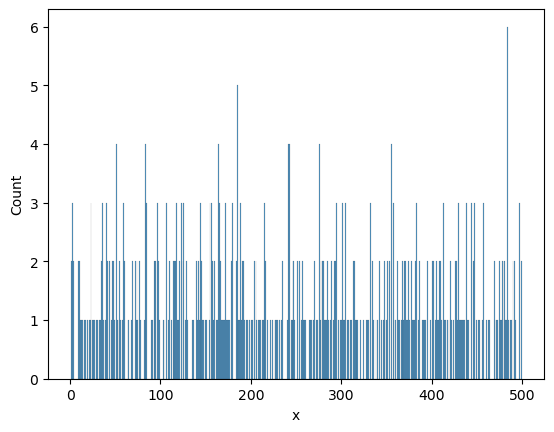

In [7]:
sns.histplot(defects_df['x'],bins=500)

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_2860\229425927.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=defects_df, x='class', ax=axs[0, 1], palette='viridis')
C:\Users\Gabriel\AppData\Local\Temp\ipykernel_2860\229425927.py:22: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(defects_df['x'], ax=axs[1, 1], shade=True, color='purple')


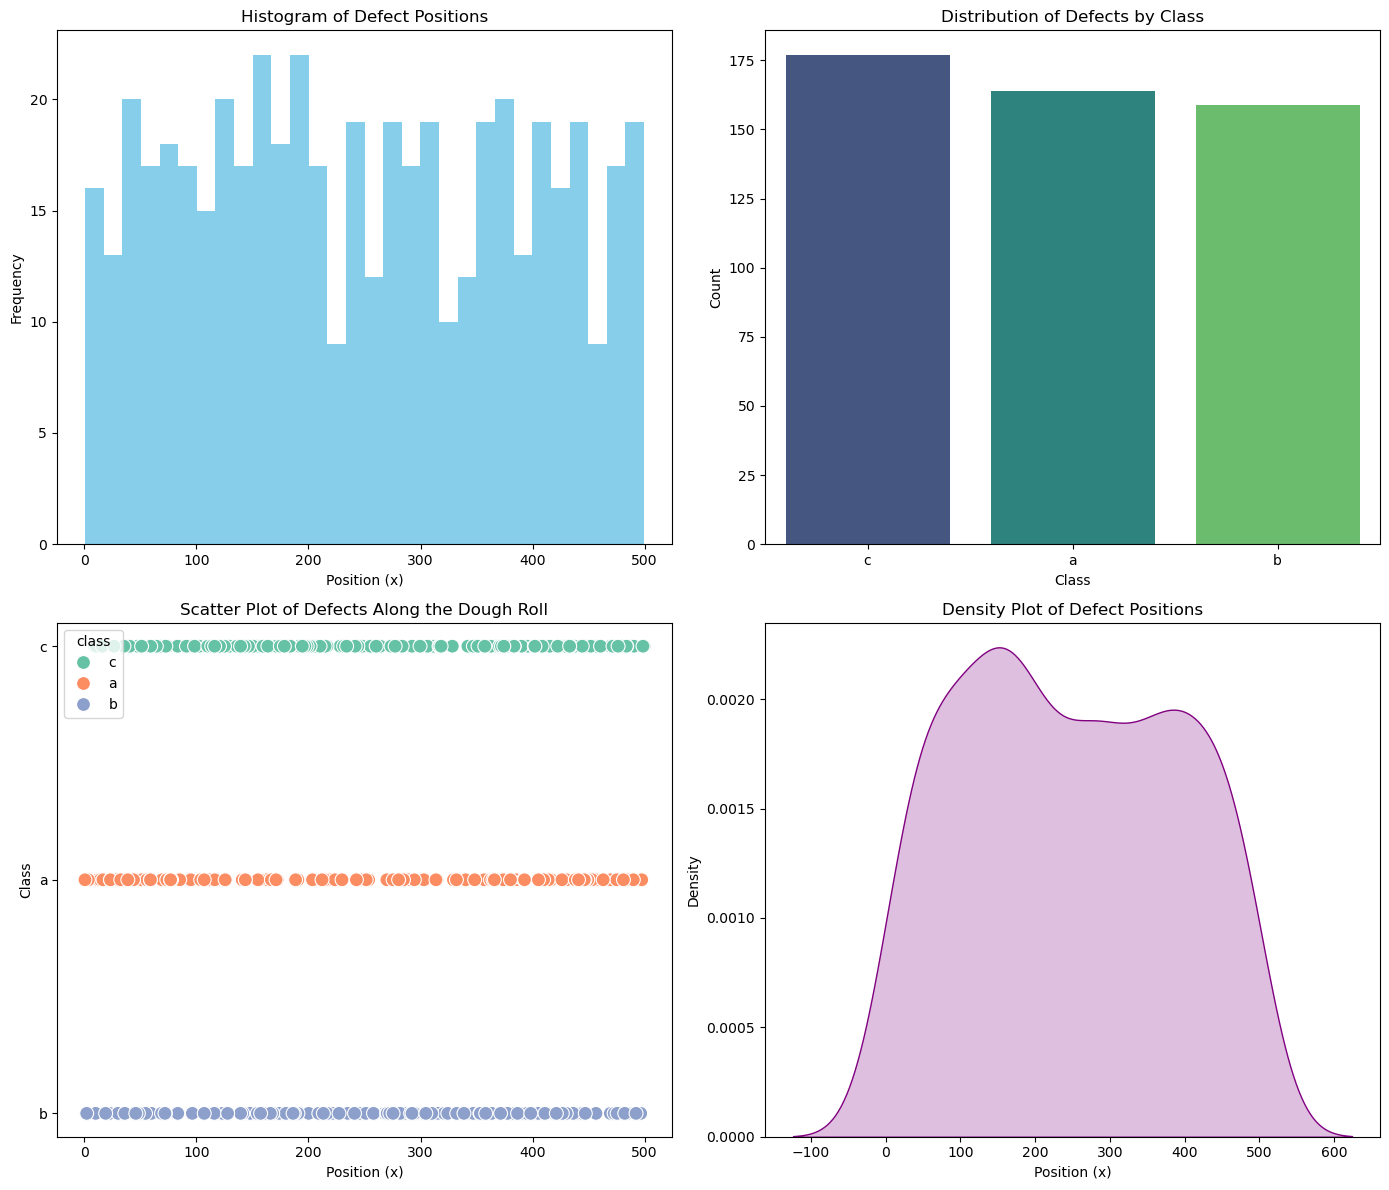

In [8]:
fig, axs = plt.subplots(2, 2, figsize=(14, 12))

# 1. Histogram of Defect Positions
axs[0, 0].hist(defects_df['x'], bins=30, color='skyblue')
axs[0, 0].set_title('Histogram of Defect Positions')
axs[0, 0].set_xlabel('Position (x)')
axs[0, 0].set_ylabel('Frequency')

# 2. Distribution of Defects by Class
sns.countplot(data=defects_df, x='class', ax=axs[0, 1], palette='viridis')
axs[0, 1].set_title('Distribution of Defects by Class')
axs[0, 1].set_xlabel('Class')
axs[0, 1].set_ylabel('Count')

# 3. Scatter Plot of Defects Along the Dough Roll
sns.scatterplot(data=defects_df, x='x', y='class', hue='class', ax=axs[1, 0], palette='Set2', s=100)
axs[1, 0].set_title('Scatter Plot of Defects Along the Dough Roll')
axs[1, 0].set_xlabel('Position (x)')
axs[1, 0].set_ylabel('Class')

# 4. Density Plot of Defect Positions
sns.kdeplot(defects_df['x'], ax=axs[1, 1], shade=True, color='purple')
axs[1, 1].set_title('Density Plot of Defect Positions')
axs[1, 1].set_xlabel('Position (x)')

# Adjust layout for readability
plt.tight_layout()
plt.show()


Test class biscuit

In [9]:
from pb import BiscuitOptimization

In [10]:
defects_df

,x,class
0,355.449335,c
1,92.496236,a
2,141.876795,c
3,431.833902,c
4,435.028461,c
...,...,...
495,171.161186,a
496,365.899255,a
497,157.372180,b
498,275.538229,b


In [11]:
import importlib
import pb
# importlib.reload(pb)

In [19]:
pb=BiscuitOptimization(defects=defects_df,num_bins=1000)

In [20]:
pb.assign_defects_to_bins()

In [21]:
pb.bins

{0: {'biscuit': None, 'defects': []},
 1: {'biscuit': None, 'defects': ['a', 'a']},
 2: {'biscuit': None, 'defects': []},
 3: {'biscuit': None, 'defects': ['a']},
 4: {'biscuit': None, 'defects': ['a', 'b']},
 5: {'biscuit': None, 'defects': []},
 6: {'biscuit': None, 'defects': []},
 7: {'biscuit': None, 'defects': ['b', 'a']},
 8: {'biscuit': None, 'defects': []},
 9: {'biscuit': None, 'defects': []},
 10: {'biscuit': None, 'defects': []},
 11: {'biscuit': None, 'defects': []},
 12: {'biscuit': None, 'defects': []},
 13: {'biscuit': None, 'defects': []},
 14: {'biscuit': None, 'defects': []},
 15: {'biscuit': None, 'defects': []},
 16: {'biscuit': None, 'defects': []},
 17: {'biscuit': None, 'defects': ['c']},
 18: {'biscuit': None, 'defects': ['c']},
 19: {'biscuit': None, 'defects': ['c']},
 20: {'biscuit': None, 'defects': ['b']},
 21: {'biscuit': None, 'defects': ['c']},
 22: {'biscuit': None, 'defects': []},
 23: {'biscuit': None, 'defects': []},
 24: {'biscuit': None, 'defects'

In [15]:
def assign_defects_to_bins(defects,num_bins,bins):
        """Assigner les défauts à chaque bin en fonction de leur position et du nombre total de bins."""
        bin_size = 500 / num_bins  # Taille de chaque bin
        for _,defect in defects.iterrows():  # Utilise .iterrows() pour itérer sur les lignes du DataFrame
            position = defect['x']  # Position continue du défaut
            bin_index = int(position / bin_size)  # Calculer dans quel bin placer le défaut
            bins[bin_index]['defects'].append(defect['class'])  # Ajouter le défaut au bin concerné
            print(bin_index)
        return bins

In [16]:
num_bins=500
bins={i: {'biscuit': None, 'defects': []} for i in range(num_bins)}

In [17]:
assign_defects_to_bins(defects_df,num_bins,bins)

355
92
141
431
435
205
34
443
69
301
342
216
367
93
401
74
356
457
395
368
163
484
55
171
119
332
85
289
156
143
83
108
57
9
439
146
259
431
293
373
368
257
308
145
488
93
487
21
464
154
412
214
53
478
314
59
379
149
351
362
469
3
267
121
344
37
483
94
357
12
472
491
8
456
97
445
386
22
218
14
59
315
347
227
469
426
203
484
284
444
163
257
265
390
97
314
330
246
95
427
82
410
247
191
456
228
65
478
150
48
429
128
9
33
234
163
51
25
382
328
329
253
301
44
279
2
68
209
82
179
216
334
178
416
264
246
345
125
153
301
221
0
1
184
26
125
85
253
214
383
391
107
46
10
115
137
285
480
304
84
383
484
54
117
188
172
122
395
97
437
49
438
355
475
385
35
279
381
129
136
39
482
273
403
375
335
205
158
29
371
241
277
482
321
276
216
241
40
430
282
82
203
312
401
408
406
242
184
437
280
206
22
414
352
96
192
300
292
74
496
294
210
362
201
89
350
68
415
281
499
381
214
168
159
490
77
123
469
30
223
10
200
163
497
340
421
498
433
406
288
83
480
176
311
370
360
190
157
364
16
240
332
173
447
248
484
275


{0: {'biscuit': None, 'defects': ['a', 'a']},
 1: {'biscuit': None, 'defects': ['a']},
 2: {'biscuit': None, 'defects': ['a', 'b']},
 3: {'biscuit': None, 'defects': ['b', 'a']},
 4: {'biscuit': None, 'defects': []},
 5: {'biscuit': None, 'defects': []},
 6: {'biscuit': None, 'defects': []},
 7: {'biscuit': None, 'defects': []},
 8: {'biscuit': None, 'defects': ['c']},
 9: {'biscuit': None, 'defects': ['c', 'c']},
 10: {'biscuit': None, 'defects': ['c', 'b']},
 11: {'biscuit': None, 'defects': []},
 12: {'biscuit': None, 'defects': ['a']},
 13: {'biscuit': None, 'defects': []},
 14: {'biscuit': None, 'defects': ['a']},
 15: {'biscuit': None, 'defects': []},
 16: {'biscuit': None, 'defects': ['a', 'c']},
 17: {'biscuit': None, 'defects': []},
 18: {'biscuit': None, 'defects': []},
 19: {'biscuit': None, 'defects': ['b']},
 20: {'biscuit': None, 'defects': []},
 21: {'biscuit': None, 'defects': ['b']},
 22: {'biscuit': None, 'defects': ['a', 'b']},
 23: {'biscuit': None, 'defects': ['a',

In [18]:
defects_df.sort_values(by=['x'],ascending=True)

,x,class
479,0.700561,a
141,0.848185,a
142,1.769825,a
493,2.207230,b
125,2.313038,a
...,...,...
219,496.411441,a
449,496.429679,b
243,497.370667,a
246,498.455612,c
